In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
from tqdm import tqdm
import matplotlib.pyplot as plt

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [2]:
batch_size = 128
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))
])

train_data = datasets.MNIST('mnist_data', train=True, download=True, transform=transform)
test_data = datasets.MNIST('mnist_data', train=False, download=True, transform=transform)

random_labels = torch.randint(0, 10, (len(train_data),), dtype=torch.long)
train_data.targets = random_labels

training_DataLoader = DataLoader(train_data, batch_size=batch_size, shuffle=True)
testing_DataLoader = DataLoader(test_data, batch_size=batch_size, shuffle=False)


In [3]:
class Model(nn.Module):
    def __init__(self):
        super(Model, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, stride=1, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.fc1 = nn.Linear(64 * 7 * 7, 128)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(x.size(0), -1)  # Flatten the tensor
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x


In [4]:
def train(model, optimizer, train_loader):
    model.train()
    loss_func = torch.nn.CrossEntropyLoss()
    correct = 0
    total_samples = 0
    running_loss = 0.0

    for images, labels in tqdm(train_loader):
        images, labels = images.to(device), labels.to(device)
        
        outputs = model(images)
        loss = loss_func(outputs, labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()


        running_loss += loss.item() * images.size(0)
        _, predicted = torch.max(outputs, 1)
        correct += (predicted == labels).sum().item()
        total_samples += labels.size(0)

    train_loss = running_loss / total_samples
    train_acc = 100. * correct / total_samples
    return train_loss, train_acc


def test(model, test_loader):
    model.eval()
    loss_func = torch.nn.CrossEntropyLoss()
    correct = 0
    total_samples = 0
    running_loss = 0.0

    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)

            outputs = model(images)
            loss = loss_func(outputs, labels)
            running_loss += loss.item() * images.size(0)

            _, predicted = torch.max(outputs, 1)
            correct += (predicted == labels).sum().item()
            total_samples += labels.size(0)

    # Calculate average loss
    test_loss = running_loss / total_samples
    test_acc = 100. * correct / total_samples
    return test_loss, test_acc

In [5]:

epochs = 50
model = Model().to(device)
optimizer = optim.Adam(model.parameters(), lr=1e-4)

train_loss_arr = []
test_loss_arr = []
train_acc_arr = []
test_acc_arr = []


for epoch in range(epochs):
    train_loss, train_acc = train(model, optimizer, training_DataLoader)
    test_loss, test_acc = test(model, testing_DataLoader)

    print(f'Epoch {epoch+1}/{epochs}, Train Loss: {train_loss:.6f}, Test Loss: {test_loss:.6f}, '
          f'Train Accuracy: {train_acc:.2f}%, Test Accuracy: {test_acc:.2f}%')

    train_loss_arr.append(train_loss)
    test_loss_arr.append(test_loss)
    train_acc_arr.append(train_acc)
    test_acc_arr.append(test_acc)

100%|██████████| 469/469 [00:11<00:00, 41.71it/s]


Epoch 1/50, Train Loss: 2.303347, Test Loss: 2.303787, Train Accuracy: 10.03%, Test Accuracy: 11.05%


100%|██████████| 469/469 [00:10<00:00, 43.28it/s]


Epoch 2/50, Train Loss: 2.302420, Test Loss: 2.304528, Train Accuracy: 10.48%, Test Accuracy: 9.52%


100%|██████████| 469/469 [00:10<00:00, 43.78it/s]


Epoch 3/50, Train Loss: 2.302012, Test Loss: 2.302831, Train Accuracy: 10.61%, Test Accuracy: 7.71%


100%|██████████| 469/469 [00:10<00:00, 43.17it/s]


Epoch 4/50, Train Loss: 2.300701, Test Loss: 2.301449, Train Accuracy: 10.92%, Test Accuracy: 9.95%


100%|██████████| 469/469 [00:10<00:00, 42.95it/s]


Epoch 5/50, Train Loss: 2.298692, Test Loss: 2.305454, Train Accuracy: 11.50%, Test Accuracy: 10.75%


100%|██████████| 469/469 [00:10<00:00, 43.16it/s]


Epoch 6/50, Train Loss: 2.295771, Test Loss: 2.307434, Train Accuracy: 12.00%, Test Accuracy: 10.80%


100%|██████████| 469/469 [00:10<00:00, 43.49it/s]


Epoch 7/50, Train Loss: 2.291512, Test Loss: 2.309200, Train Accuracy: 12.58%, Test Accuracy: 9.86%


100%|██████████| 469/469 [00:10<00:00, 43.93it/s]


Epoch 8/50, Train Loss: 2.286218, Test Loss: 2.305447, Train Accuracy: 13.45%, Test Accuracy: 10.65%


100%|██████████| 469/469 [00:10<00:00, 44.94it/s]


Epoch 9/50, Train Loss: 2.280276, Test Loss: 2.332602, Train Accuracy: 13.85%, Test Accuracy: 6.24%


100%|██████████| 469/469 [00:10<00:00, 46.36it/s]


Epoch 10/50, Train Loss: 2.273501, Test Loss: 2.306397, Train Accuracy: 14.71%, Test Accuracy: 11.57%


100%|██████████| 469/469 [00:10<00:00, 46.04it/s]


Epoch 11/50, Train Loss: 2.265965, Test Loss: 2.311363, Train Accuracy: 15.41%, Test Accuracy: 11.52%


100%|██████████| 469/469 [00:10<00:00, 46.15it/s]


Epoch 12/50, Train Loss: 2.255959, Test Loss: 2.324944, Train Accuracy: 16.26%, Test Accuracy: 11.03%


100%|██████████| 469/469 [00:10<00:00, 46.47it/s]


Epoch 13/50, Train Loss: 2.246707, Test Loss: 2.347326, Train Accuracy: 16.78%, Test Accuracy: 11.71%


100%|██████████| 469/469 [00:10<00:00, 46.00it/s]


Epoch 14/50, Train Loss: 2.235961, Test Loss: 2.325059, Train Accuracy: 17.65%, Test Accuracy: 11.97%


100%|██████████| 469/469 [00:10<00:00, 45.89it/s]


Epoch 15/50, Train Loss: 2.225553, Test Loss: 2.335399, Train Accuracy: 18.27%, Test Accuracy: 10.04%


100%|██████████| 469/469 [00:10<00:00, 46.10it/s]


Epoch 16/50, Train Loss: 2.213869, Test Loss: 2.359671, Train Accuracy: 18.89%, Test Accuracy: 10.19%


100%|██████████| 469/469 [00:10<00:00, 46.64it/s]


Epoch 17/50, Train Loss: 2.201555, Test Loss: 2.361344, Train Accuracy: 19.59%, Test Accuracy: 9.96%


100%|██████████| 469/469 [00:10<00:00, 46.71it/s]


Epoch 18/50, Train Loss: 2.188728, Test Loss: 2.376737, Train Accuracy: 20.34%, Test Accuracy: 9.04%


100%|██████████| 469/469 [00:10<00:00, 46.12it/s]


Epoch 19/50, Train Loss: 2.176193, Test Loss: 2.380524, Train Accuracy: 20.96%, Test Accuracy: 10.19%


100%|██████████| 469/469 [00:10<00:00, 46.50it/s]


Epoch 20/50, Train Loss: 2.163137, Test Loss: 2.371572, Train Accuracy: 21.57%, Test Accuracy: 10.83%


100%|██████████| 469/469 [00:10<00:00, 46.36it/s]


Epoch 21/50, Train Loss: 2.148142, Test Loss: 2.398965, Train Accuracy: 22.45%, Test Accuracy: 9.46%


100%|██████████| 469/469 [00:10<00:00, 46.69it/s]


Epoch 22/50, Train Loss: 2.134291, Test Loss: 2.356577, Train Accuracy: 23.11%, Test Accuracy: 11.60%


100%|██████████| 469/469 [00:10<00:00, 46.51it/s]


Epoch 23/50, Train Loss: 2.120481, Test Loss: 2.386356, Train Accuracy: 23.82%, Test Accuracy: 10.71%


100%|██████████| 469/469 [00:10<00:00, 46.48it/s]


Epoch 24/50, Train Loss: 2.106840, Test Loss: 2.397406, Train Accuracy: 24.49%, Test Accuracy: 10.37%


100%|██████████| 469/469 [00:10<00:00, 46.53it/s]


Epoch 25/50, Train Loss: 2.090699, Test Loss: 2.424950, Train Accuracy: 25.14%, Test Accuracy: 9.56%


100%|██████████| 469/469 [00:10<00:00, 46.37it/s]


Epoch 26/50, Train Loss: 2.076035, Test Loss: 2.467308, Train Accuracy: 25.70%, Test Accuracy: 9.05%


100%|██████████| 469/469 [00:10<00:00, 46.68it/s]


Epoch 27/50, Train Loss: 2.061113, Test Loss: 2.390741, Train Accuracy: 26.58%, Test Accuracy: 11.37%


100%|██████████| 469/469 [00:10<00:00, 46.51it/s]


Epoch 28/50, Train Loss: 2.046928, Test Loss: 2.476179, Train Accuracy: 27.27%, Test Accuracy: 9.40%


100%|██████████| 469/469 [00:10<00:00, 46.04it/s]


Epoch 29/50, Train Loss: 2.031150, Test Loss: 2.488843, Train Accuracy: 27.87%, Test Accuracy: 9.25%


100%|██████████| 469/469 [00:10<00:00, 46.06it/s]


Epoch 30/50, Train Loss: 2.015486, Test Loss: 2.495538, Train Accuracy: 28.56%, Test Accuracy: 9.09%


100%|██████████| 469/469 [00:10<00:00, 46.03it/s]


Epoch 31/50, Train Loss: 2.000660, Test Loss: 2.492179, Train Accuracy: 29.16%, Test Accuracy: 10.12%


100%|██████████| 469/469 [00:10<00:00, 46.32it/s]


Epoch 32/50, Train Loss: 1.984018, Test Loss: 2.516566, Train Accuracy: 29.99%, Test Accuracy: 9.59%


100%|██████████| 469/469 [00:10<00:00, 46.32it/s]


Epoch 33/50, Train Loss: 1.969495, Test Loss: 2.545892, Train Accuracy: 30.36%, Test Accuracy: 9.36%


100%|██████████| 469/469 [00:10<00:00, 46.01it/s]


Epoch 34/50, Train Loss: 1.954437, Test Loss: 2.558636, Train Accuracy: 30.89%, Test Accuracy: 9.44%


100%|██████████| 469/469 [00:10<00:00, 46.02it/s]


Epoch 35/50, Train Loss: 1.937334, Test Loss: 2.535802, Train Accuracy: 31.83%, Test Accuracy: 9.80%


100%|██████████| 469/469 [00:10<00:00, 45.79it/s]


Epoch 36/50, Train Loss: 1.921859, Test Loss: 2.632089, Train Accuracy: 32.46%, Test Accuracy: 8.05%


100%|██████████| 469/469 [00:10<00:00, 46.57it/s]


Epoch 37/50, Train Loss: 1.905415, Test Loss: 2.610740, Train Accuracy: 33.33%, Test Accuracy: 9.63%


100%|██████████| 469/469 [00:09<00:00, 46.97it/s]


Epoch 38/50, Train Loss: 1.889958, Test Loss: 2.633317, Train Accuracy: 33.60%, Test Accuracy: 8.20%


100%|██████████| 469/469 [00:10<00:00, 46.73it/s]


Epoch 39/50, Train Loss: 1.874334, Test Loss: 2.567006, Train Accuracy: 34.49%, Test Accuracy: 10.37%


100%|██████████| 469/469 [00:10<00:00, 46.68it/s]


Epoch 40/50, Train Loss: 1.858065, Test Loss: 2.621909, Train Accuracy: 35.13%, Test Accuracy: 9.07%


100%|██████████| 469/469 [00:10<00:00, 46.79it/s]


Epoch 41/50, Train Loss: 1.842957, Test Loss: 2.684471, Train Accuracy: 35.77%, Test Accuracy: 9.55%


100%|██████████| 469/469 [00:09<00:00, 47.31it/s]


Epoch 42/50, Train Loss: 1.827387, Test Loss: 2.669118, Train Accuracy: 36.23%, Test Accuracy: 9.73%


100%|██████████| 469/469 [00:09<00:00, 46.93it/s]


Epoch 43/50, Train Loss: 1.811733, Test Loss: 2.668235, Train Accuracy: 36.75%, Test Accuracy: 10.37%


100%|██████████| 469/469 [00:10<00:00, 46.13it/s]


Epoch 44/50, Train Loss: 1.794682, Test Loss: 2.716605, Train Accuracy: 37.65%, Test Accuracy: 8.96%


100%|██████████| 469/469 [00:10<00:00, 46.22it/s]


Epoch 45/50, Train Loss: 1.778862, Test Loss: 2.715456, Train Accuracy: 38.26%, Test Accuracy: 9.08%


100%|██████████| 469/469 [00:10<00:00, 46.49it/s]


Epoch 46/50, Train Loss: 1.762823, Test Loss: 2.754798, Train Accuracy: 38.77%, Test Accuracy: 9.62%


100%|██████████| 469/469 [00:10<00:00, 46.89it/s]


Epoch 47/50, Train Loss: 1.749339, Test Loss: 2.765737, Train Accuracy: 39.38%, Test Accuracy: 9.16%


100%|██████████| 469/469 [00:10<00:00, 46.60it/s]


Epoch 48/50, Train Loss: 1.730340, Test Loss: 2.838240, Train Accuracy: 40.11%, Test Accuracy: 8.31%


100%|██████████| 469/469 [00:10<00:00, 46.09it/s]


Epoch 49/50, Train Loss: 1.714882, Test Loss: 2.833221, Train Accuracy: 40.59%, Test Accuracy: 8.78%


100%|██████████| 469/469 [00:10<00:00, 46.56it/s]


Epoch 50/50, Train Loss: 1.701768, Test Loss: 2.791847, Train Accuracy: 41.19%, Test Accuracy: 9.74%


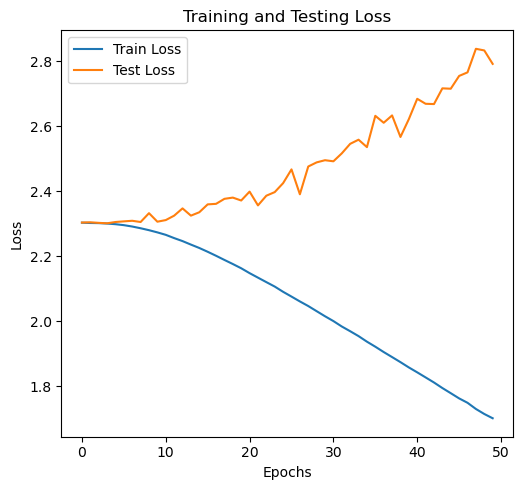

In [6]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(train_loss_arr, label='Train Loss')
plt.plot(test_loss_arr, label='Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Testing Loss')
plt.legend()

plt.tight_layout()
plt.show()